In [ ]:
!pip install pyAgrum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.5 MB/s eta 0:00:00


In [ ]:
pip --version

pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)


In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
!/usr/bin/python3 -m pip install pyAgrum --upgrade --force-reinstall

  Using cached pyagrum-2.2.1-cp310-abi3-manylinux2014_x86_64.whl.metadata (5.3 kB)
ERROR: Operation cancelled by user
^C


In [ ]:
!pip list --verbose | grep pyAgrum
!pip show pyAgrum

pyAgrum                                  2.2.1                /root/.local/lib/python3.12/site-packages pip
Name: pyAgrum
Version: 2.2.1
Summary: Bayesian networks and other Probabilistic Graphical Models.
Home-page: https://agrum.gitlab.io/
Author: Pierre-Henri Wuillemin and Christophe Gonzales
Author-email: info@agrum.org
License: 
Location: /root/.local/lib/python3.12/site-packages
Requires: matplotlib, numpy, pydot
Required-by: 


In [ ]:
import site
import os

user_site_packages = site.getusersitepackages()
print(f"User site-packages directory: {user_site_packages}")

if os.path.exists(user_site_packages):
    print("Contents of user site-packages directory:")
    for item in os.listdir(user_site_packages):
        print(item)
else:
    print("User site-packages directory does not exist.")

User site-packages directory: /root/.local/lib/python3.12/site-packages
Contents of user site-packages directory:
pyparsing
contourpy-1.3.3.dist-info
pyagrum-2.2.1.dist-info
kiwisolver
packaging
cycler-0.12.1.dist-info
numpy-2.3.4.dist-info
cycler
__pycache__
six-1.17.0.dist-info
numpy.libs
pydot
pylab.py
pyparsing-3.2.5.dist-info
pyagrum
contourpy
python_dateutil-2.9.0.post0.dist-info
fontTools
matplotlib
numpy
mpl_toolkits
packaging-25.0.dist-info
six.py
matplotlib-3.10.7.dist-info
fonttools-4.60.1.dist-info
kiwisolver-1.4.9.dist-info
pydot-4.0.1.dist-info
pillow.libs
pillow-12.0.0.dist-info
PIL
dateutil


In [ ]:
import pyagrum as gum
print("pyAgrum imported successfully.")

#Since pyAgrum 2.0.0, the package name follows PEP8 rules and is now pyagrum (lowercase).

pyAgrum imported successfully.


In [ ]:
import pyagrum.lib.notebook as gnb

**Création du réseau bayésien Singly-Connected**

In [ ]:
bn = gum.BayesNet('DAG Singly Connected')

A = bn.add(gum.LabelizedVariable('A', 'Variable A', ['a1', 'a2']))
B = bn.add(gum.LabelizedVariable('B', 'Variable B', ['b1', 'b2', 'b3']))
C = bn.add(gum.LabelizedVariable('C', 'Variable C', ['c1', 'c2']))
D = bn.add(gum.LabelizedVariable('D', 'Variable D', ['d1', 'd2']))
E = bn.add(gum.LabelizedVariable('E', 'Variable E', ['e1', 'e2', 'e3']))
F = bn.add(gum.LabelizedVariable('F', 'Variable F', ['f1', 'f2']))

print(bn)

BN{nodes: 6, arcs: 0, domainSize: 144, dim: 8, mem: 112o}


In [ ]:
bn.addArc(A, B)
bn.addArc(C, D)
bn.addArc(C, E)
bn.addArc(B, D)
bn.addArc(D, F)

print(bn)

BN{nodes: 6, arcs: 5, domainSize: 144, dim: 18, mem: 256o}


**Définition des tables de probabilité conditionnelle**

In [ ]:
#P(A)
bn.cpt('A').fillWith([0.6, 0.4])
#P(C)
bn.cpt('C').fillWith([0.4, 0.6])
#P(B | A)
bn.cpt('B')[{'A': 'a1'}] = [0.6, 0.3, 0.1]
bn.cpt('B')[{'A': 'a2'}] = [0.2, 0.4, 0.4]
#P(E | C)
bn.cpt('E')[{'C': 'c1'}] = [0.85, 0.1, 0.05]
bn.cpt('E')[{'C': 'c2'}] = [0.1, 0.2, 0.7]
#P(D | B, C)
bn.cpt('D')[{'B': 'b1', 'C': 'c1'}] = [0.9, 0.1]
bn.cpt('D')[{'B': 'b1', 'C': 'c2'}] = [0.6, 0.4]
bn.cpt('D')[{'B': 'b2', 'C': 'c1'}] = [0.7, 0.3]
bn.cpt('D')[{'B': 'b2', 'C': 'c2'}] = [0.2, 0.8]
bn.cpt('D')[{'B': 'b3', 'C': 'c1'}] = [0.25, 0.75]
bn.cpt('D')[{'B': 'b3', 'C': 'c2'}] = [0.05, 0.95]
#P(F | D)
bn.cpt('F')[{'D': 'd1'}] = [0.85, 0.15]
bn.cpt('F')[{'D': 'd2'}] = [0.85, 0.15]


**Visualisation du réseau**

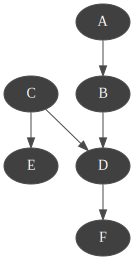

In [ ]:
gnb.showBN(bn)

**Message Propagation**

On suppose :

*   A = a1 (évidence connue)
*   E = e3 (évidence connue)





In [ ]:
ie = gum.LazyPropagation(bn)
ie.setEvidence({'A': 'a1', 'E': 'e3'})
ie.makeInference()

**Marginalisation**

In [ ]:
print("P(B | A=a1, E=e3) =\n", ie.posterior('B'))
print("P(C | A=a1, E=e3) =\n", ie.posterior('C'))
print("P(D | A=a1, E=e3) =\n", ie.posterior('D'))
print("P(F | A=a1, E=e3) =\n", ie.posterior('F'))


P(B | A=a1, E=e3) =
 
  B                          |
b1       |b2       |b3       |
---------|---------|---------|
 0.6000  | 0.3000  | 0.1000  |

P(C | A=a1, E=e3) =
 
  C                |
c1       |c2       |
---------|---------|
 0.0455  | 0.9545  |

P(D | A=a1, E=e3) =
 
  D                |
d1       |d2       |
---------|---------|
 0.4409  | 0.5591  |

P(F | A=a1, E=e3) =
 
  F                |
f1       |f2       |
---------|---------|
 0.8500  | 0.1500  |



In [ ]:
ie.posterior('B')

(pyagrum.Tensor@0x1bd70180) 
  B                          |
b1       |b2       |b3       |
---------|---------|---------|
 0.6000  | 0.3000  | 0.1000  |

In [ ]:
ie.posterior('C')

(pyagrum.Tensor@0x1b8c4350) 
  C                |
c1       |c2       |
---------|---------|
 0.0455  | 0.9545  |

In [ ]:
ie.posterior('D')

(pyagrum.Tensor@0x1c945740) 
  D                |
d1       |d2       |
---------|---------|
 0.4409  | 0.5591  |

In [ ]:
ie.posterior('F')

(pyagrum.Tensor@0x1c3dcf90) 
  F                |
f1       |f2       |
---------|---------|
 0.8500  | 0.1500  |

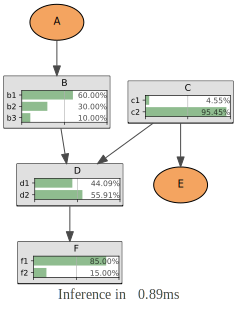

In [ ]:
gnb.showInference(bn,
                  evs={'A': 'a1', 'E': 'e3'},
                  targets={'B', 'C', 'D', 'F'},
                  size="10")




---



**Création du réseau bayésien Multiply-Connected**

In [ ]:
bn2 = gum.BayesNet("DAG Multiply Connected")

A = bn2.add(gum.LabelizedVariable('A','', ['a1','a2']))
B = bn2.add(gum.LabelizedVariable('B','', ['b1','b2']))
C = bn2.add(gum.LabelizedVariable('C','', ['c1','c2']))
D = bn2.add(gum.LabelizedVariable('D','', ['d1','d2']))
E = bn2.add(gum.LabelizedVariable('E','', ['e1','e2']))
F = bn2.add(gum.LabelizedVariable('F','', ['f1','f2']))

In [ ]:
bn2.addArc(A,B)
bn2.addArc(A,C)
bn2.addArc(B,D)
bn2.addArc(C,E)
bn2.addArc(D,F)
bn2.addArc(E,F)

print(bn2)

BN{nodes: 6, arcs: 6, domainSize: 64, dim: 13, mem: 208o}


**Définition des tables de probabilité conditionnelle**

In [ ]:
bn2.cpt('A').fillWith([0.6, 0.4])
bn2.cpt('B')[{'A': 'a1'}] = [0.8, 0.2]
bn2.cpt('B')[{'A': 'a2'}] = [0.1, 0.9]
bn2.cpt('C')[{'A': 'a1'}] = [0.7, 0.3]
bn2.cpt('C')[{'A': 'a2'}] = [0.2, 0.8]
bn2.cpt('D')[{'B': 'b1'}] = [0.95, 0.05]
bn2.cpt('D')[{'B': 'b2'}] = [0.3, 0.7]
bn2.cpt('E')[{'C': 'c1'}] = [0.9, 0.1]
bn2.cpt('E')[{'C': 'c2'}] = [0.15, 0.85]
bn2.cpt('F')[{'E': 'e1', 'D': 'd1'}] = [0.99, 0.01]
bn2.cpt('F')[{'E': 'e1', 'D': 'd2'}] = [0.5, 0.5]
bn2.cpt('F')[{'E': 'e2', 'D': 'd1'}] = [0.4, 0.6]
bn2.cpt('F')[{'E': 'e2', 'D': 'd2'}] = [0.05, 0.95]

**Visualisation du réseau**

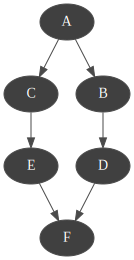

In [ ]:
gnb.showBN(bn2)

**Création de l’arbre de jonction**

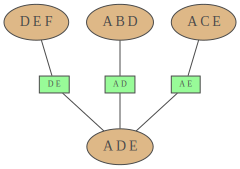

In [ ]:
ie=gum.LazyPropagation(bn2)
jt=ie.junctionTree()
gnb.showJunctionTree(bn2, size='12')

**Propagation sans ´evidence**

In [ ]:
ie.makeInference()

**Affichage des prioris**

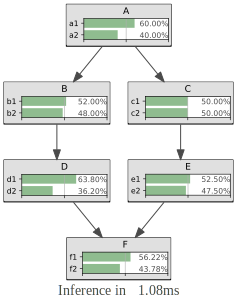

In [ ]:
gnb.showInference(bn2,evs={}, targets={'A', 'B', 'C', 'D', 'E', 'F'}, size='12')